In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Load the dataset https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [63]:
# Count the number of rows and columns in the dataset
df.shape

(569, 33)

In [64]:
# Get the number of null values in each column
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [65]:
# Drop the columns with null values
df = df.dropna(axis=1)
df.shape

(569, 32)

In [66]:
# Get a count of the number of Malignant and Benign tumors
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

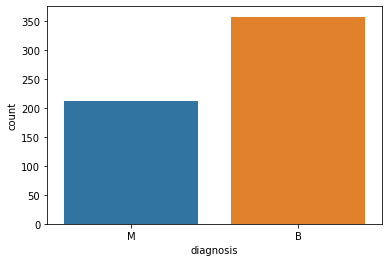

In [67]:
# Visualize the data
sns.countplot(x = 'diagnosis', data=df)

In [68]:
# Look at the datatypes to check for encoding issues
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [69]:
# Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.iloc[:,1] = le.fit_transform(df.iloc[:,1].values)

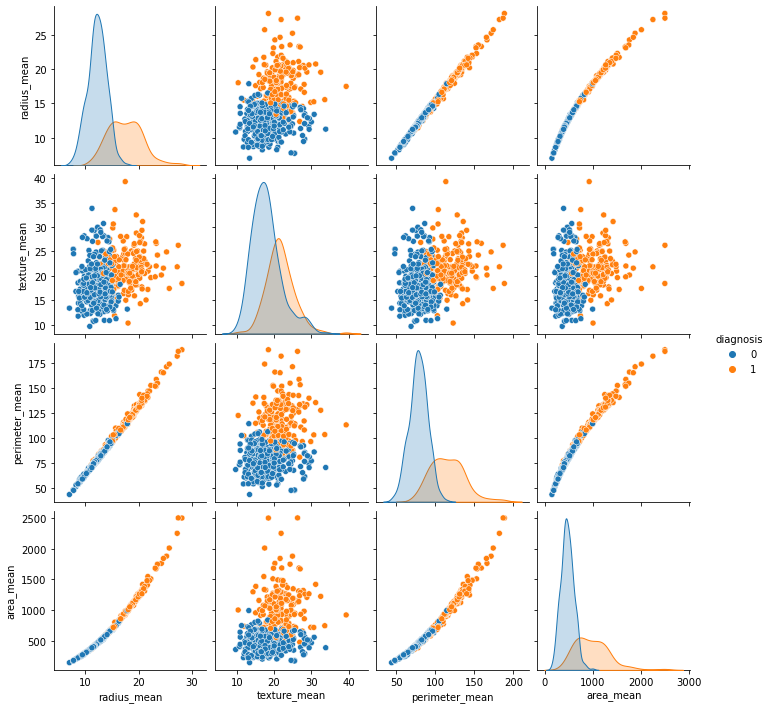

In [70]:
# Create a pair plot
sns.pairplot(df.iloc[:,1:6], hue='diagnosis')

In [71]:
# Print the first 5 rows of the new data
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [74]:
# Get the correlation of the columns
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


<AxesSubplot:>

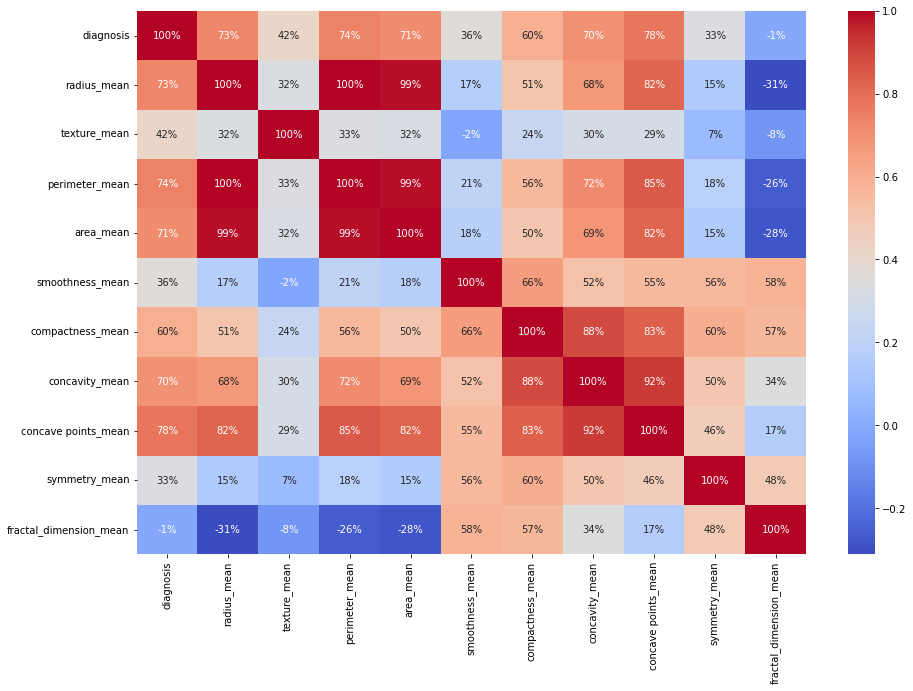

In [87]:
# Visualize the correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt='.0%', cmap='coolwarm')

In [88]:
# Split the data into independent and dependent variables
X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values

In [89]:
# Split the data into 75% training and 25% testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [92]:
# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [105]:
# Create a logistic regression model
def models(X_train, Y_train):
    # Logistic Regression
    from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression(random_state=0)
    logreg.fit(X_train, Y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
    dt.fit(X_train, Y_train)

    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    rf.fit(X_train, Y_train)

    #KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(X_train, Y_train)

    #SVM
    from sklearn.svm import SVC
    svm = SVC(kernel='rbf', random_state=0)
    svm.fit(X_train, Y_train)

    #Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    nb = GaussianNB()
    nb.fit(X_train, Y_train)

    #Support Vector Machine
    from sklearn.svm import SVC
    svm = SVC(kernel='rbf', random_state=0)
    svm.fit(X_train, Y_train)

    #Print the accuracy of each model
    print('Logistic Regression: ', logreg.score(X_test, Y_test))
    print('Decision Tree: ', dt.score(X_test, Y_test))
    print('Random Forest: ', rf.score(X_test, Y_test))
    print('KNN: ', knn.score(X_test, Y_test))
    print('SVM: ', svm.score(X_test, Y_test))
    print('Naive Bayes: ', nb.score(X_test, Y_test))
    print('Support Vector Machine: ', svm.score(X_test, Y_test))

    #Return the models
    return logreg, dt, rf, knn, svm, nb

In [106]:
# Get the models
logreg, dt, rf, knn, svm, nb = models(X_train, Y_train)

Logistic Regression:  0.951048951048951
Decision Tree:  0.9370629370629371
Random Forest:  0.965034965034965
KNN:  0.951048951048951
SVM:  0.965034965034965
Naive Bayes:  0.9440559440559441
Support Vector Machine:  0.965034965034965


In [113]:
# Test the models accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix
def cm(model, X_test, Y_test):
    # Get the confusion matrix
    cm = confusion_matrix(Y_test, model.predict(X_test))
    # Get the accuracy score
    acc = accuracy_score(Y_test, model.predict(X_test))
    TP = cm[0][0]
    TN = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
    # Print the confusion matrix and accuracy
    print('Confusion Matrix: \n', cm)
    print('Testing Accuracy for',model, '=', (TP + TN) / (TP + TN + FP + FN))
    print()

cm(logreg, X_test, Y_test)
cm(dt, X_test, Y_test)
cm(rf, X_test, Y_test)
cm(knn, X_test, Y_test)
cm(svm, X_test, Y_test)
cm(nb, X_test, Y_test)

Confusion Matrix: 
 [[86  4]
 [ 3 50]]
Testing Accuracy for LogisticRegression(random_state=0) = 0.951048951048951

Confusion Matrix: 
 [[83  7]
 [ 2 51]]
Testing Accuracy for DecisionTreeClassifier(criterion='entropy', random_state=0) = 0.9370629370629371

Confusion Matrix: 
 [[87  3]
 [ 2 51]]
Testing Accuracy for RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0) = 0.965034965034965

Confusion Matrix: 
 [[89  1]
 [ 6 47]]
Testing Accuracy for KNeighborsClassifier() = 0.951048951048951

Confusion Matrix: 
 [[88  2]
 [ 3 50]]
Testing Accuracy for SVC(random_state=0) = 0.965034965034965

Confusion Matrix: 
 [[87  3]
 [ 5 48]]
Testing Accuracy for GaussianNB() = 0.9440559440559441



In [117]:
# Get metrics for each model
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

models = [logreg, dt, rf, knn, svm, nb]
for model in models:
    print(model)
    print(classification_report(Y_test, model.predict(X_test)))
    print(accuracy_score(Y_test, model.predict(X_test)))
    print()


LogisticRegression(random_state=0)
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

DecisionTreeClassifier(criterion='entropy', random_state=0)
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        90
           1       0.88      0.96      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

0.9370629370629371

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94   

In [119]:
# Print the predictions for each model and compare them to the actual values
def pred(model, X_test, Y_test):
    # Print the predictions
    print('Predictions for', model)
    print(model.predict(X_test))
    print()
    # Print the actual values
    print('Actual values')
    print(Y_test)
    print()

for model in models:
    pred(model, X_test, Y_test)    

Predictions for LogisticRegression(random_state=0)
[1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

Actual values
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

Predictions for DecisionTreeClassifier(criterion='entropy', random_state=0)
[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1
 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0